Shape: (7043, 21)
Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1               

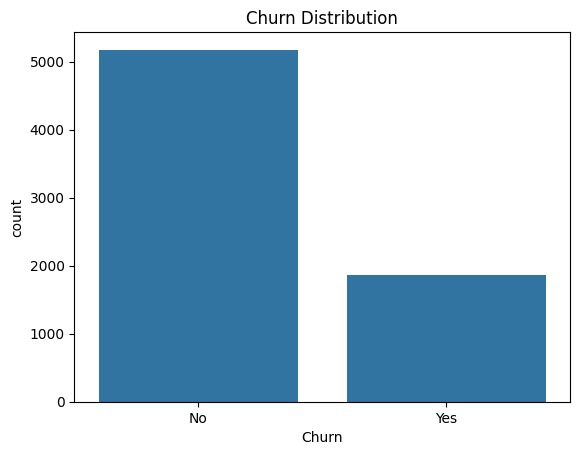

In [7]:
# ==============================
# TELCO CUSTOMER CHURN - EDA & PREPROCESSING
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# =====================
# 1. Load dataset
# =====================
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Preview data
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

# =====================
# 2. Basic EDA
# =====================

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Data types
print("\nData types:")
print(df.dtypes)

# Convert 'TotalCharges' to numeric (it sometimes has blank strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Recheck missing after conversion
print("\nMissing after fixing TotalCharges:", df.isnull().sum())

# Drop customerID since it’s not useful for training
df.drop('customerID', axis=1, inplace=True)

# Check target distribution
print("\nTarget variable (Churn) distribution:")
print(df['Churn'].value_counts(normalize=True))

# Plot target imbalance
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()


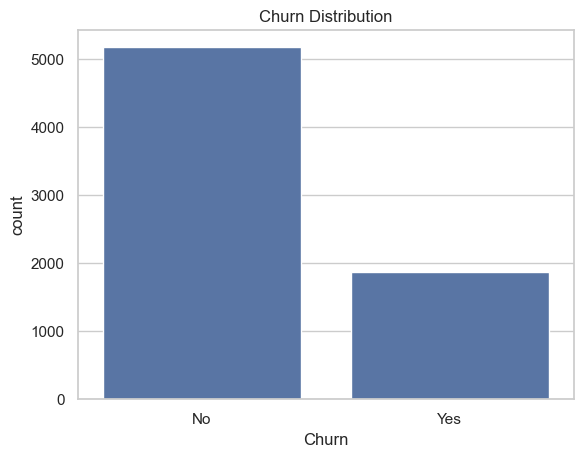

In [23]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# =====================
# 1. Load dataset
# =====================
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Plot target imbalance
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

Shape: (7043, 21)
Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1               

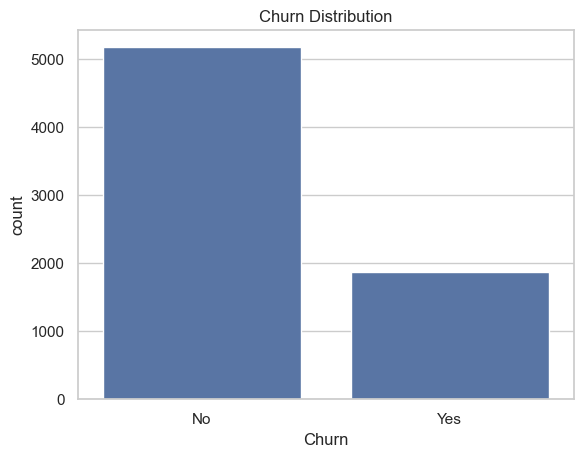


Categorical features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Numerical features: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
EDA & Preprocessing setup complete.


In [27]:
# ==============================
# TELCO CUSTOMER CHURN - EDA & PREPROCESSING
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# =====================
# 1. Load dataset
# =====================
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Preview data
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

# =====================
# 2. Basic EDA
# =====================

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Data types
print("\nData types:")
print(df.dtypes)

# Convert 'TotalCharges' to numeric (it sometimes has blank strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Recheck missing after conversion
print("\nMissing after fixing TotalCharges:", df.isnull().sum())

# Drop customerID since it’s not useful for training
df.drop('customerID', axis=1, inplace=True)

# Check target distribution
print("\nTarget variable (Churn) distribution:")
print(df['Churn'].value_counts(normalize=True))

# Plot target imbalance
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# =====================
# 3. Handle missing values
# =====================
df.loc[:, 'TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# =====================
# 4. Split categorical & numerical features
# =====================
cat_features = df.select_dtypes(include=['object']).columns.tolist()
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

cat_features.remove('Churn')  # exclude target

print("\nCategorical features:", cat_features)
print("Numerical features:", num_features)

# =====================
# 5. Encode target variable
# =====================
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# =====================
# 6. Split into train-test
# =====================
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =====================
# 7. Preprocessing pipelines
# =====================

# Numeric pipeline
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine both
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)

# =====================
# 8. Handle imbalance using SMOTE
# =====================
# Apply SMOTE after preprocessing later during model training
# (so that we avoid data leakage)

print("EDA & Preprocessing setup complete.")


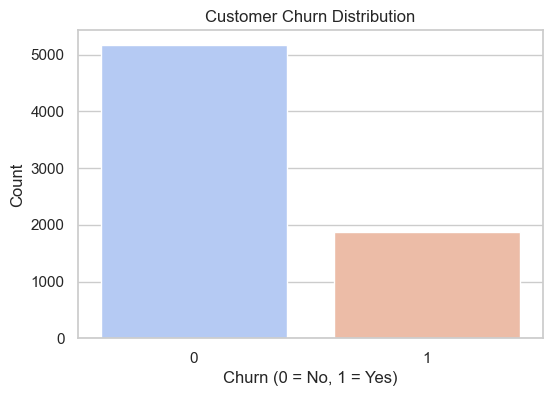

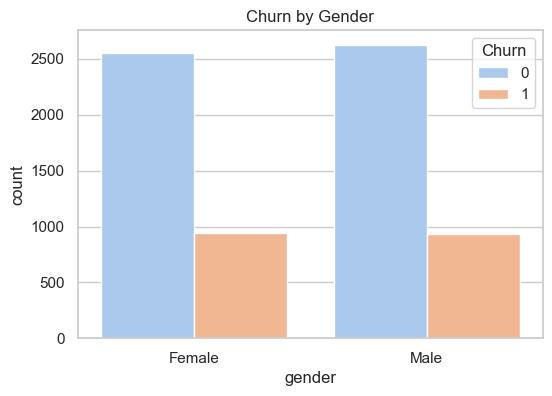

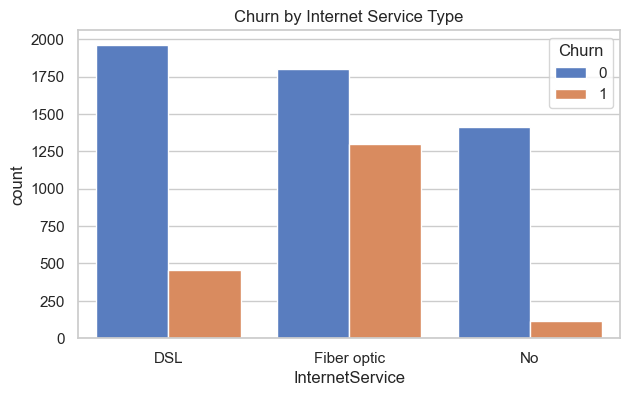

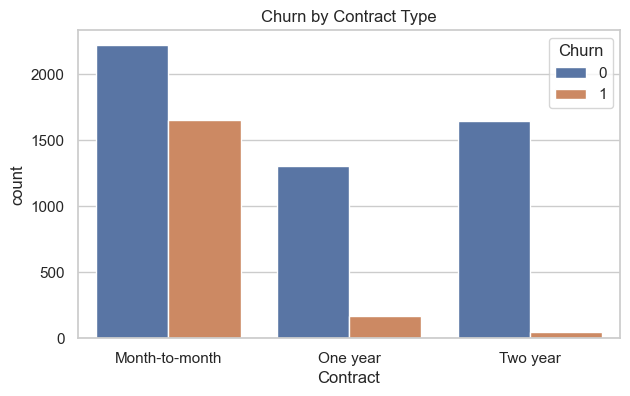

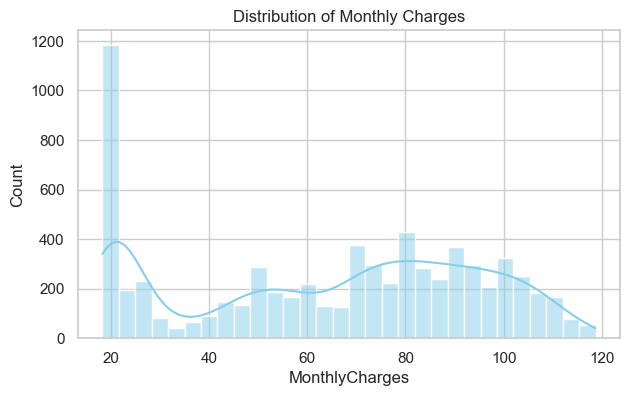

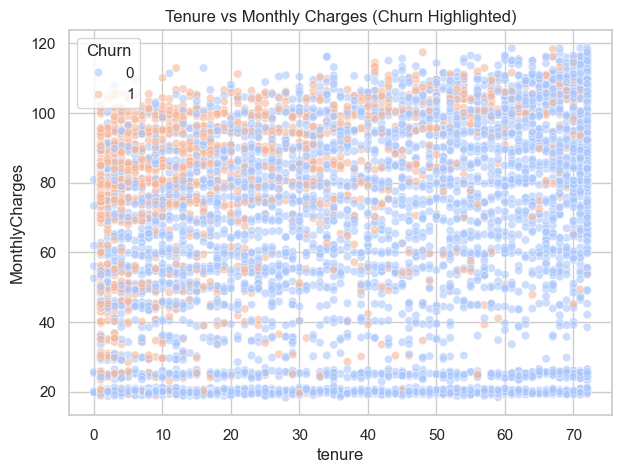

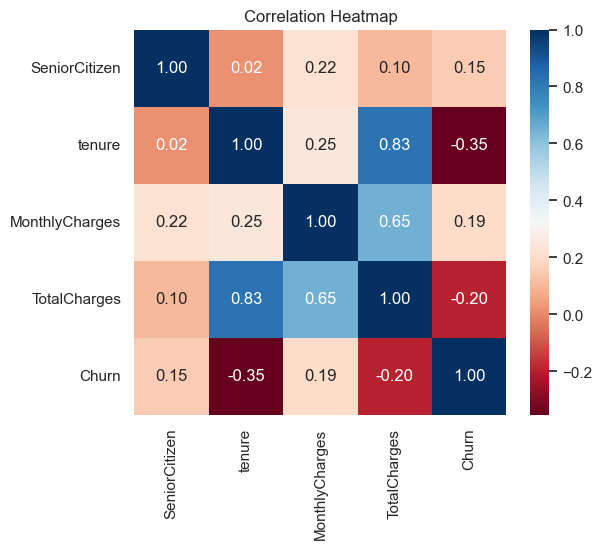

✅ EDA visualizations completed.


In [11]:
# ==============================
# TELCO CUSTOMER CHURN - VISUALIZATIONS
# ==============================

import matplotlib.pyplot as plt
import seaborn as sns

# Set consistent style
sns.set(style="whitegrid")

# 1️⃣ Churn distribution (already plotted once, but make it more formal)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', hue='Churn', data=df, palette='coolwarm', legend=False)
plt.title('Customer Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# 2️⃣ Gender vs Churn
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='Churn', data=df, palette='pastel')
plt.title('Churn by Gender')
plt.show()

# 3️⃣ Internet Service vs Churn
plt.figure(figsize=(7, 4))
sns.countplot(x='InternetService', hue='Churn', data=df, palette='muted')
plt.title('Churn by Internet Service Type')
plt.show()

# 4️⃣ Contract Type vs Churn
plt.figure(figsize=(7, 4))
sns.countplot(x='Contract', hue='Churn', data=df, palette='deep')
plt.title('Churn by Contract Type')
plt.show()

# 5️⃣ Monthly Charges distribution
plt.figure(figsize=(7, 4))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Monthly Charges')
plt.show()

# 6️⃣ Tenure vs Monthly Charges (scatter)
plt.figure(figsize=(7, 5))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df, palette='coolwarm', alpha=0.6)
plt.title('Tenure vs Monthly Charges (Churn Highlighted)')
plt.show()

# 7️⃣ Correlation heatmap (numerical features only)
plt.figure(figsize=(6, 5))
sns.heatmap(df[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges','Churn']].corr(), 
            annot=True, cmap='RdBu', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

print("✅ EDA visualizations completed.")


Before SMOTE: [4139 1495]
After SMOTE: [4139 4139]

📊 Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.50      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409


📊 Feedforward NN Results:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1035
           1       0.55      0.69      0.61       374

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.77      0.78      1409


📊 Random Forest (Ensemble) Results:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1035
           1       0.54      0.68      0.60       374

    accuracy                       

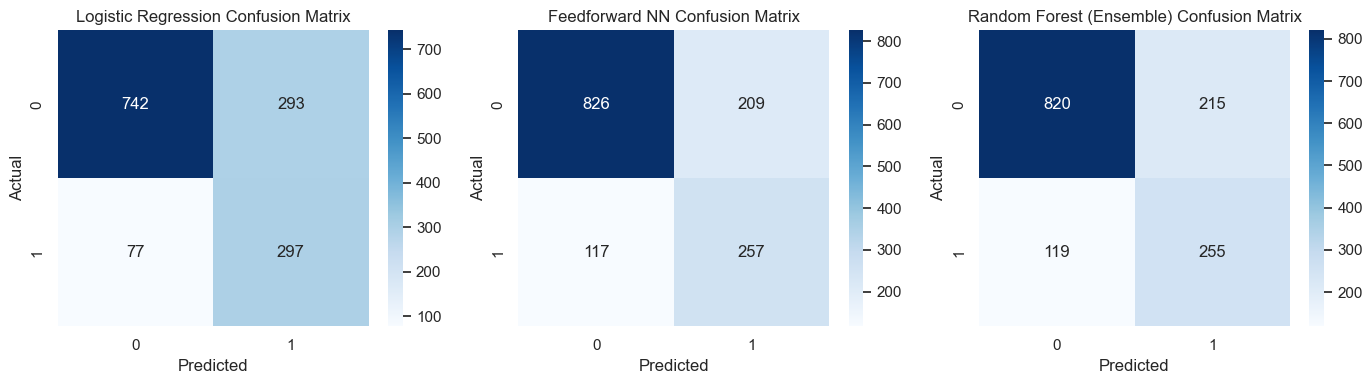

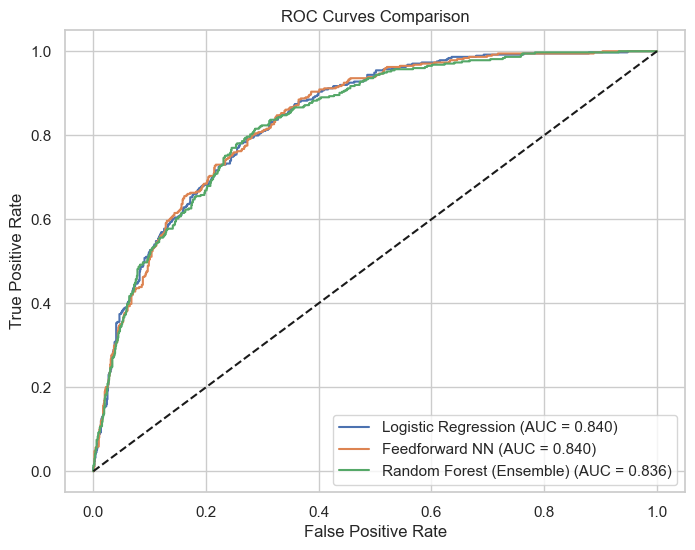


✅ Model training, evaluation, and visualizations completed successfully.


In [33]:
# ==============================================
# MODEL TRAINING & EVALUATION
# Logistic Regression | Feedforward NN | Voting Classifier
# ==============================================

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, roc_curve, auc
)
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE
from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras import Input, Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


# =====================
# 1️⃣ Apply preprocessing + SMOTE
# =====================
# Transform X_train with preprocessor
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Handle imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_processed, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_bal))

# =====================
# 2️⃣ Logistic Regression Model
# =====================
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train_bal, y_train_bal)

y_pred_lr = log_reg.predict(X_test_processed)
y_pred_lr_prob = log_reg.predict_proba(X_test_processed)[:, 1]


# =====================
# 3️⃣ Custom Keras Neural Network Wrapper
# =====================
class KerasWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, input_dim, epochs=30, batch_size=64, verbose=0):
        self.input_dim = input_dim
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose

    def _build_model(self):
        model = Sequential([
            Input(shape=(self.input_dim,)),
            Dense(64, activation='relu'),
            Dropout(0.3),
            Dense(32, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
        model.compile(optimizer=Adam(learning_rate=0.001),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.model_ = self._build_model()
        early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
        self.model_.fit(X, y,
                        epochs=self.epochs,
                        batch_size=self.batch_size,
                        validation_split=0.2,
                        verbose=self.verbose,
                        callbacks=[early_stop])
        self.classes_ = np.unique(y)
        return self

    def predict_proba(self, X):
        prob = self.model_.predict(X, verbose=0)
        return np.hstack([1 - prob, prob])  # (n_samples, 2)

    def predict(self, X):
        return (self.predict_proba(X)[:, 1] > 0.5).astype(int)


# Initialize FNN model
fnn = KerasWrapper(input_dim=X_train_bal.shape[1])

# Fit standalone FNN
fnn.fit(X_train_bal, y_train_bal)
y_pred_fnn_prob = fnn.predict_proba(X_test_processed)[:, 1]
y_pred_fnn = (y_pred_fnn_prob > 0.5).astype(int)

# =====================
# 4️⃣ Ensemble Model (Random Forest)
# =====================
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    n_estimators=200,      # number of trees
    max_depth=10,          # control overfitting
    random_state=42
)
rf_clf.fit(X_train_bal, y_train_bal)

y_pred_rf = rf_clf.predict(X_test_processed)
y_pred_rf_prob = rf_clf.predict_proba(X_test_processed)[:, 1]


# =====================
# 5️⃣ Evaluation Function + Results List
# =====================
def evaluate_model(name, y_true, y_pred, y_prob):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_roc = roc_auc_score(y_true, y_prob)
    print(f"\n📊 {name} Results:")
    print(classification_report(y_true, y_pred))
    return [name, acc, prec, rec, f1, auc_roc]

# Create results list and evaluate models
results = []
results.append(evaluate_model("Logistic Regression", y_test, y_pred_lr, y_pred_lr_prob))
results.append(evaluate_model("Feedforward NN", y_test, y_pred_fnn, y_pred_fnn_prob))
results.append(evaluate_model("Random Forest (Ensemble)", y_test, y_pred_rf, y_pred_rf_prob))

# Create summary table
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1", "ROC-AUC"])
print("\n=== Model Comparison ===")
print(results_df)


# =====================
# 6️⃣ Confusion Matrices
# =====================
models = {
    "Logistic Regression": y_pred_lr,
    "Feedforward NN": y_pred_fnn,
    "Random Forest (Ensemble)": y_pred_rf
}

plt.figure(figsize=(14, 4))
for i, (name, preds) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()


# =====================
# 7️⃣ ROC Curves
# =====================
plt.figure(figsize=(8,6))

for name, (preds, probs) in {
    "Logistic Regression": (y_pred_lr, y_pred_lr_prob),
    "Feedforward NN": (y_pred_fnn, y_pred_fnn_prob),
    "Random Forest (Ensemble)": (y_pred_rf, y_pred_rf_prob)
}.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print("\n✅ Model training, evaluation, and visualizations completed successfully.")



In [41]:
# ==============================================
# MODEL TUNING
# Logistic Regression | Random Forest | Feedforward NN
# ==============================================

from sklearn.model_selection import GridSearchCV
from tensorflow.keras import backend as K
import warnings
import pandas as pd
from IPython.display import display, HTML
warnings.filterwarnings("ignore")
import tensorflow as tf
tf.get_logger().setLevel('ERROR')


# ======================================================
# 1️⃣ Logistic Regression Tuning
# ======================================================
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'saga']
}

grid_lr = GridSearchCV(
    LogisticRegression(max_iter=500, random_state=42),
    param_grid=param_grid_lr,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_lr.fit(X_train_bal, y_train_bal)

best_lr = grid_lr.best_estimator_
print("\n✅ Best Logistic Regression Params:", grid_lr.best_params_)

y_pred_lr_tuned = best_lr.predict(X_test_processed)
y_pred_lr_tuned_prob = best_lr.predict_proba(X_test_processed)[:, 1]


# ======================================================
# 2️⃣ Random Forest Tuning
# ======================================================
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [8, 10, 12],
    'min_samples_split': [2, 4, 6]
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)
grid_rf.fit(X_train_bal, y_train_bal)

best_rf = grid_rf.best_estimator_
print("\n✅ Best Random Forest Params:", grid_rf.best_params_)

y_pred_rf_tuned = best_rf.predict(X_test_processed)
y_pred_rf_tuned_prob = best_rf.predict_proba(X_test_processed)[:, 1]


# ======================================================
# 3️⃣ Feedforward Neural Network Tuning (Manual)
# ======================================================

# Small grid for FNN tuning
fnn_param_grid = [
    {'neurons1': 32, 'neurons2': 16, 'lr': 0.001, 'epochs': 30},
    {'neurons1': 64, 'neurons2': 32, 'lr': 0.001, 'epochs': 40},
    {'neurons1': 128, 'neurons2': 64, 'lr': 0.0005, 'epochs': 50},
]

best_f1 = 0
best_params_fnn = None

for params in fnn_param_grid:
    print(f"\n🔍 Training FNN with params: {params}")
    K.clear_session()

    # Build model
    model = Sequential([
        Input(shape=(X_train_bal.shape[1],)),
        Dense(params['neurons1'], activation='relu'),
        Dropout(0.3),
        Dense(params['neurons2'], activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=params['lr']),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    model.fit(X_train_bal, y_train_bal, epochs=params['epochs'], batch_size=64,
              validation_split=0.2, verbose=0)

    # Evaluate
    y_pred_prob = model.predict(X_test_processed, verbose=0)
    y_pred = (y_pred_prob > 0.5).astype(int)
    f1 = f1_score(y_test, y_pred)
    print(f"F1 Score: {f1:.4f}")

    if f1 > best_f1:
        best_f1 = f1
        best_params_fnn = params
        best_model_fnn = model

print("\n✅ Best FNN Params:", best_params_fnn)

y_pred_fnn_tuned_prob = best_model_fnn.predict(X_test_processed, verbose=0)
y_pred_fnn_tuned = (y_pred_fnn_tuned_prob > 0.5).astype(int)


# ======================================================
# 4️⃣ Compare Tuned Models
# ======================================================

results_tuned = []
results_tuned.append(evaluate_model("Logistic Regression (Tuned)", y_test, y_pred_lr_tuned, y_pred_lr_tuned_prob))
results_tuned.append(evaluate_model("Feedforward NN (Tuned)", y_test, y_pred_fnn_tuned, y_pred_fnn_tuned_prob))
results_tuned.append(evaluate_model("Random Forest (Tuned Ensemble)", y_test, y_pred_rf_tuned, y_pred_rf_tuned_prob))

results_tuned_df = pd.DataFrame(results_tuned, columns=["Model", "Accuracy", "Precision", "Recall", "F1", "ROC-AUC"])
print("\n=== Tuned Model Comparison ===")
print(results_tuned_df)
# Show formatted table
styled_table = (
    results_tuned_df.style
    .highlight_max(subset=['Accuracy', 'Precision', 'Recall', 'F1', 'ROC-AUC'], color='lightgreen')
    .set_caption("Table 2.1: Tuned Model Comparison (Classification)")
    .format({
        'Accuracy': '{:.3f}',
        'Precision': '{:.3f}',
        'Recall': '{:.3f}',
        'F1': '{:.3f}',
        'ROC-AUC': '{:.3f}'
    })
)
display(HTML(styled_table.to_html()))

Fitting 5 folds for each of 8 candidates, totalling 40 fits

✅ Best Logistic Regression Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Fitting 3 folds for each of 27 candidates, totalling 81 fits

✅ Best Random Forest Params: {'max_depth': 12, 'min_samples_split': 2, 'n_estimators': 300}

🔍 Training FNN with params: {'neurons1': 32, 'neurons2': 16, 'lr': 0.001, 'epochs': 30}
F1 Score: 0.5977

🔍 Training FNN with params: {'neurons1': 64, 'neurons2': 32, 'lr': 0.001, 'epochs': 40}
F1 Score: 0.5917

🔍 Training FNN with params: {'neurons1': 128, 'neurons2': 64, 'lr': 0.0005, 'epochs': 50}
F1 Score: 0.5961

✅ Best FNN Params: {'neurons1': 32, 'neurons2': 16, 'lr': 0.001, 'epochs': 30}

📊 Logistic Regression (Tuned) Results:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1035
           1       0.50      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.70      0.76      0.71   

,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,Logistic Regression (Tuned),0.737,0.503,0.794,0.616,0.839
1,Feedforward NN (Tuned),0.774,0.566,0.634,0.598,0.836
2,Random Forest (Tuned Ensemble),0.767,0.551,0.647,0.595,0.833


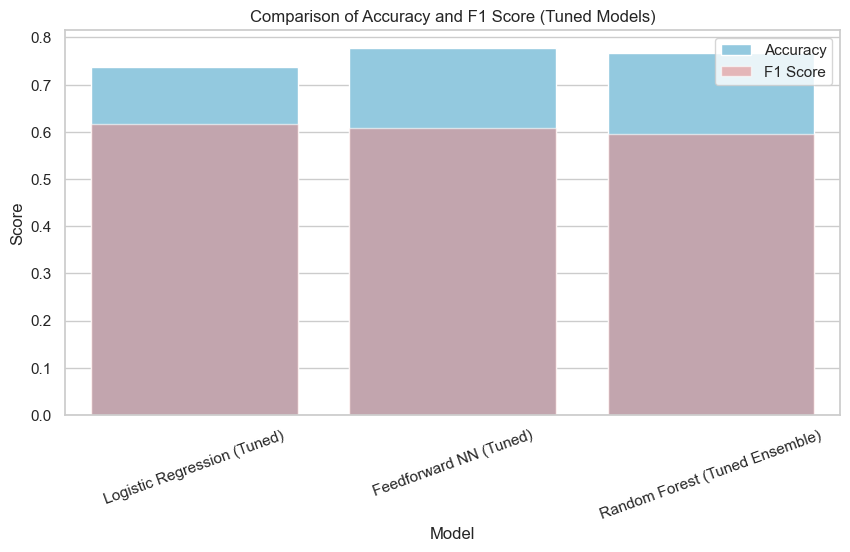

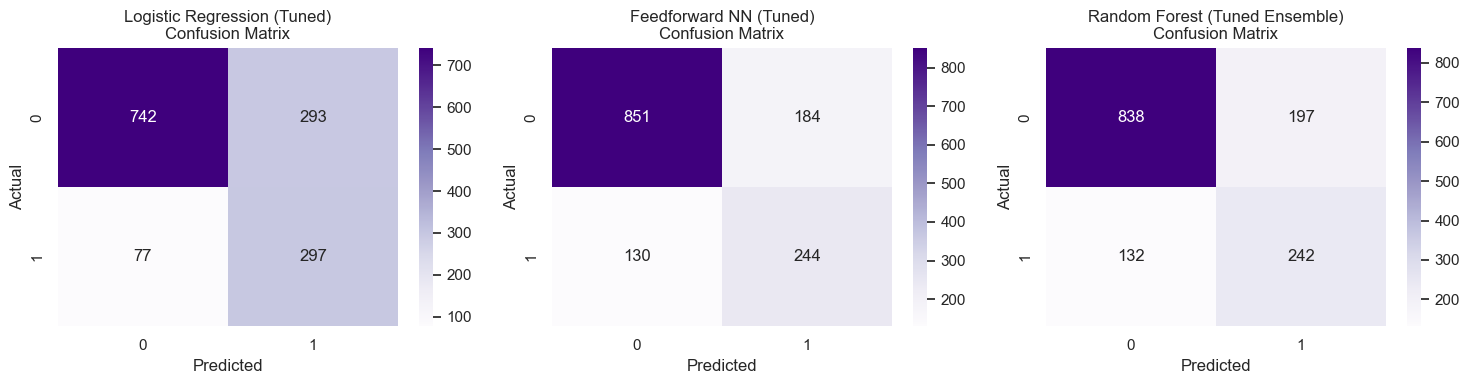

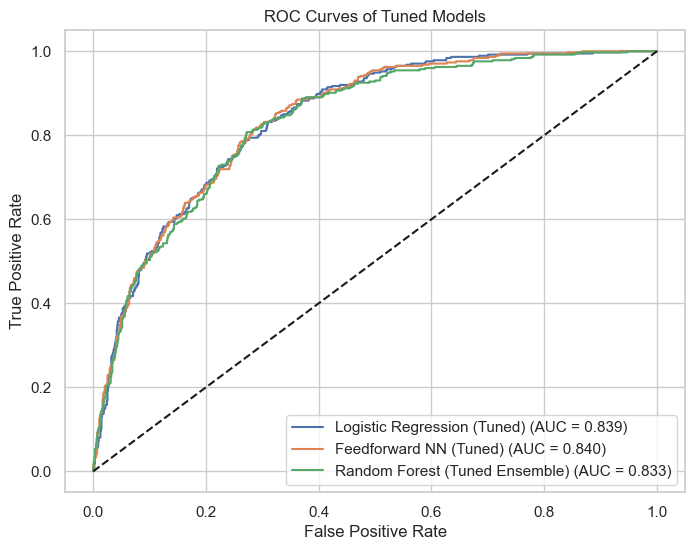


✅ Visualization of tuned model results completed successfully.


In [41]:
# ==============================================
# VISUALIZATION OF TUNED MODEL PERFORMANCE
# ==============================================

import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Comparison bar chart for key metrics
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Accuracy", data=results_tuned_df, color="skyblue", label="Accuracy")
sns.barplot(x="Model", y="F1", data=results_tuned_df, color="lightcoral", label="F1 Score", alpha=0.6)
plt.title("Comparison of Accuracy and F1 Score (Tuned Models)")
plt.ylabel("Score")
plt.legend()
plt.xticks(rotation=20)
plt.show()

# 2️⃣ Confusion Matrices for Tuned Models
tuned_models = {
    "Logistic Regression (Tuned)": y_pred_lr_tuned,
    "Feedforward NN (Tuned)": y_pred_fnn_tuned,
    "Random Forest (Tuned Ensemble)": y_pred_rf_tuned
}

plt.figure(figsize=(15, 4))
for i, (name, preds) in enumerate(tuned_models.items(), 1):
    plt.subplot(1, 3, i)
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
    plt.title(f'{name}\nConfusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# 3️⃣ ROC Curves for Tuned Models
plt.figure(figsize=(8,6))
for name, probs in {
    "Logistic Regression (Tuned)": y_pred_lr_tuned_prob,
    "Feedforward NN (Tuned)": y_pred_fnn_tuned_prob,
    "Random Forest (Tuned Ensemble)": y_pred_rf_tuned_prob
}.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves of Tuned Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print("\n✅ Visualization of tuned model results completed successfully.")


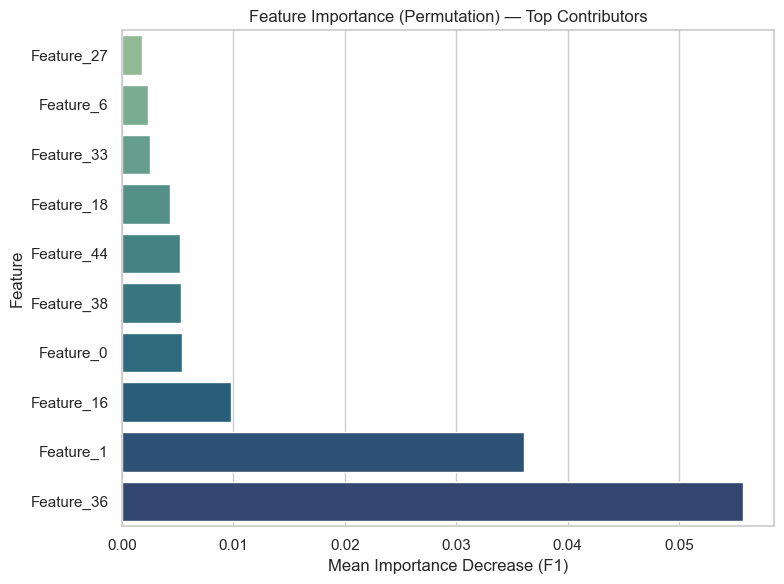

In [75]:
# =============================================
# Figure 2.7: Permutation Feature Importance
# Figure 2.8: Partial Dependence Plot (Feature Impact)
# =============================================

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

# ✅ Step 1: Define feature names safely
try:
    feature_names = preprocessor.get_feature_names_out()
except Exception:
    # fallback if preprocessor is not fitted or unavailable
    feature_names = [f"Feature_{i}" for i in range(X_test_processed.shape[1])]

# ✅ Step 2: Select your best-performing model
model = best_rf   # or best_lr / best_model_fnn depending on your results

# =============================================
# 🔹 Figure 2.7: Permutation Importance
# =============================================

perm_result = permutation_importance(
    model, X_test_processed, y_test,
    n_repeats=10, random_state=42, scoring='f1'
)

sorted_idx = perm_result.importances_mean.argsort()
top_features = np.array(feature_names)[sorted_idx][-10:]

plt.figure(figsize=(8, 6))
sns.barplot(
    x=perm_result.importances_mean[sorted_idx][-10:],  # top 10
    y=top_features,
    palette="crest"
)
plt.title("Feature Importance (Permutation) — Top Contributors")
plt.xlabel("Mean Importance Decrease (F1)")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


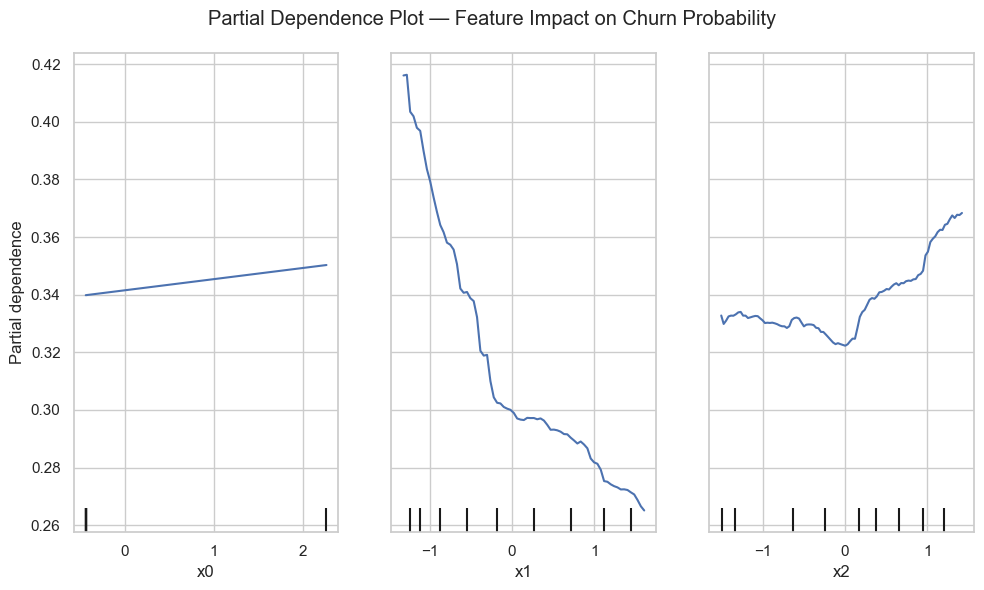

In [73]:
# =============================================
# 🔹 Figure 2.8: Partial Dependence (Feature Impact)
# =============================================

# Only numeric features can be plotted — we take top 2–3 to visualize
numeric_indices = [i for i, name in enumerate(top_features) if "Feature" not in name]
if len(numeric_indices) == 0:
    numeric_indices = range(min(3, len(top_features)))  # fallback

fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    model,
    X_test_processed,
    features=list(numeric_indices)[:3],
    kind="average",
    ax=ax
)
plt.suptitle("Partial Dependence Plot — Feature Impact on Churn Probability")
plt.tight_layout()
plt.show()